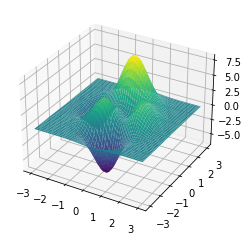

In [24]:
from mpl_toolkits.mplot3d import Axes3D  

import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
%matplotlib inline


fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
plt.show()

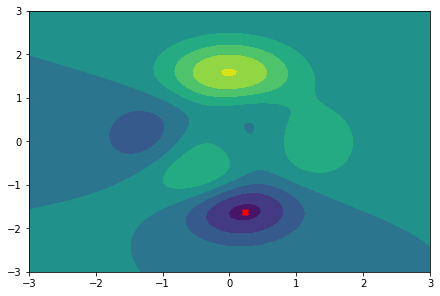

In [25]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
plt.show()

In [73]:
def validate(question,bool_fxn=lambda i,args:i=='y' or i=='n',cast=str,error_message="Please enter valid input.",*args):
    ans = input(question + "\n")
    while not bool_fxn(ans, args):
        ans = input(error_message + "\n")
    return cast(ans)

def check_decimal(lr,args):
    try:
        int(lr)
        return True
    except ValueError:
        pass
    try:
        float(lr)
        return True
    except ValueError:
        pass
    return False


eta = validate("Learning rate?",check_decimal,float)
MAX_ITER = 100
NUMVARS = 2
steps = np.empty((NUMVARS,MAX_ITER))
if validate("Generate a starting guess?") == 'y':
    steps[:,0] = np.asarray([np.random.uniform(-3,3),np.random.uniform(-3,3)])
else:
    steps[0][0] = validate("xcoord?",check_decimal,float)
    steps[1][0] = validate("ycoord?",check_decimal,float)

Learning rate?
.1
Generate a starting guess?
n
xcoord?
0
ycoord?
-1


In [26]:
def validate(question,bool_fxn=lambda i,args:i=='y' or i=='n',cast=[str],error_message="Please enter valid input.",*args):
    if not isinstance(cast,tuple):
        cast = [cast]
    ans = input(question + "\n")
    while not bool_fxn(ans, args):
        ans = input(error_message + "\n")
    for i in range(len(cast)):
        try:
            return cast[i](ans)
        except ValueError:
            pass

def check_decimal(lr,*args):
    try:
        int(lr)
        return True
    except ValueError:
        pass
    try:
        float(lr)
        return True
    except ValueError:
        pass
    return False

def check_posint(n,*args):
    try:
        return int(n) > 0
    except ValueError:
        return False


eta = validate("Learning rate?",check_decimal,float)
MAX_ITER = 'inf'
BOUND = 0
while MAX_ITER == "inf" and BOUND == 0:
    print("maxiter cannot be inf with 0 bound")
    MAX_ITER = validate("max iterations or 'inf' for unbounded?",lambda n,args:check_posint(n) or n == "inf",(int,str))
    BOUND = validate("gradient bound for stopping (can be 0 if maxiter is bounded)?",lambda n,args:check_decimal(n) and float(n) >= 0,float)
NUMVARS = 2
n = validate("How many points?",check_posint,int)
steps = np.empty((n,NUMVARS,MAX_ITER))
for i in range(n):
    steps[i,:,0] = np.asarray([np.random.uniform(-3,3),np.random.uniform(-3,3)])

Learning rate?
.05
maxiter cannot be inf with 0 bound
max iterations or 'inf' for unbounded?
100
gradient bound for stopping (can be 0 if maxiter is bounded)?
.00001
How many points?
6


In [27]:
import numdifftools as nd


def gradient(x):
    return 3*(1-x[0])**2 * np.exp(-(x[0]**2) - (x[1]+1)**2)\
        - 10*(np.true_divide(x[0],5) - x[0]**3 - x[1]**5)*np.exp(-x[0]**2 - x[1]**2)\
        - np.true_divide(1,3)*np.exp(-(x[0]+1)**2 - x[1]**2)

In [75]:
def normsquared(x):
    return np.inner(x,x)


g = nd.Gradient(gradient)
i = 1
grad = g(steps[:,0])
while i < MAX_ITER and normsquared(grad) > .0001:
    steps[:,i] = steps[:,i - 1] - eta * grad
    grad = g(steps[:,i - 1])
    i += 1

In [28]:
def normsquared(x):
    return np.inner(x,x)

g = nd.Gradient(gradient)
for i in range(n):
    j = 1
    grad = g(steps[i,:,0])
    while (MAX_ITER == "inf" or j < MAX_ITER) and normsquared(grad) > BOUND:
        steps[i,:,j] = steps[i,:,j - 1] - eta * grad
        grad = g(steps[i,:,j])
        j += 1

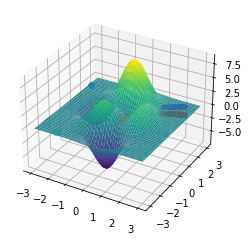

In [34]:
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.linspace(-3, 3, 100)
y = np.linspace(-3, 3, 100)
x1, x2 = np.meshgrid(x, y)
F = 3*(1-x1)**2 * np.exp(-(x1**2) - (x2+1)**2)\
   - 10*(np.true_divide(x1,5) - x1**3 - x2**5)*np.exp(-x1**2 - x2**2)\
   - np.true_divide(1,3)*np.exp(-(x1+1)**2 - x2**2)

# Plot the surface.
surf = ax.plot_surface(x1, x2, F, linewidth=0, alpha=1, cmap = 'viridis')
color = cm.rainbow(np.linspace(0,1,n))
for i,c in zip(range(n),color):
    ax.scatter(steps[i,0,:],steps[i,1,:],0,color=c)
plt.show()

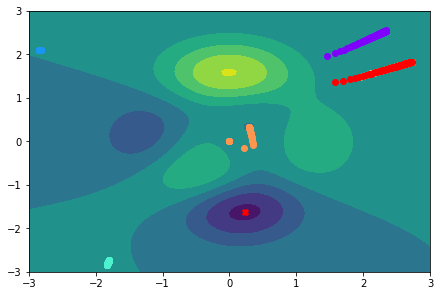

In [35]:
fig1, ax = plt.subplots(constrained_layout=True)
contour = ax.contourf(x1, x2, F,cmap = 'viridis')
plt.scatter(0.23, -1.62,c='r',marker='X')
color = cm.rainbow(np.linspace(0,1,n))
for i,c in zip(range(n),color):
    ax.scatter(steps[i,0,:],steps[i,1,:],color=c)
plt.show()